## Load Libraries

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import scikitplot as skplt

## Loading Data

In [25]:
reading_data = "C:/Users/ADMIN/Desktop/Datasets/diabetes.csv"
data = pd.read_csv(reading_data)

## Exploring Data

In [ ]:
data.head()

In [ ]:
data.describe()

In [ ]:
data.info()

In [ ]:
data.isnull().sum()

In [ ]:
# Relating BMI with outcome
sns.histplot(data=data, x="BMI", bins=20, hue="Outcome", multiple="stack", element="step")

In [ ]:
# BMI vs Pedigree Function
sns.set_theme()
sns.scatterplot(data=data, x = "Age", y="BMI", hue="DiabetesPedigreeFunction")

In [ ]:
# Histogram plot for BMI
sns.histplot(data=data, x="BMI", kde=True)

In [ ]:
# Boxplot for BMI
sns.boxplot(data=data, x="BMI")

In [ ]:
# Removing Outliers
min_threshold, max_threshold= data.BMI.quantile([0.02, 0.99])
min_threshold, max_threshold
type(min_threshold)

In [ ]:
data = data[(data.BMI>min_threshold) & (data.BMI<max_threshold)]
data.shape

In [ ]:
sns.histplot(data=data, x="BMI")

In [ ]:
#Checking total OUTCOME values
sns.countplot(data=data, x="Outcome")

## Train Data

In [26]:
# Separating the Target variable
X = data.values[:, 0:8]
Y = data.values[:, -1]

# Splitting Dataset into Test and Train
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=100)

# Function to perform training with entropy
clf_entropy = DecisionTreeClassifier(criterion="entropy", random_state=100, max_depth=3, min_samples_leaf=3)
clf_entropy.fit(X_train, y_train)



DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=3,
                       random_state=100)

In [27]:
# Function to make prediction
y_pred_en = clf_entropy.predict(X_test)
print(y_pred_en)


[0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1.
 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


In [28]:
# Checking accuracy 
print("Accuracy is", accuracy_score(y_test, y_pred_en)*100)

Accuracy is 72.72727272727273


## Confusion Matrix

In [29]:
confusion_matrix( y_test, y_pred_en)

array([[140,  10],
       [ 53,  28]], dtype=int64)

<AxesSubplot: title={'center': 'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

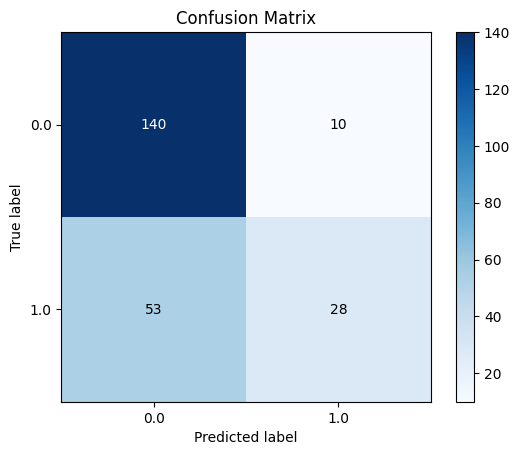

In [30]:
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix( y_test, y_pred_en)